In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 1. Init code

In [118]:
class SoftmaxClassifier:
    
    def _sigmod(self, z):
        num = np.exp(z)
        prob =  num/ np.sum(num, axis=1, keepdims=True)    
        return prob 
    
    def __init__(self, learning_rate=0.01, num_iteration=1000, reg_rate=0.003):
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.reg_rate = reg_rate
        self.bias = None
        self.weights = None
    
    def fit(self, X_data, y_labels, k_class):
        n_examples, n_features = X_data.shape
        self.bias = np.zeros((1, k_class))
        self.weights = np.random.randn(n_features, k_class)
        
        for iteration in range(self.num_iteration):
            logit = np.dot(X_data, self.weights) + self.bias
            prob = self._sigmod(logit)
#             print (prob)
            log_logg = prob[range(n_examples), y_labels]
            loss = - 1/ n_examples * np.sum(np.log(log_logg))
            reg_loss = 0.5 * self.reg_rate * np.sum(self.weights * self.weights)
            loss += reg_loss
            dloss = prob
            dloss[range(n_examples), y_labels]= dloss[range(n_examples), y_labels]  - 1
            dloss = dloss/n_examples
            dw = np.dot(X_data.T, dloss)
            dw += self.reg_rate * self.weights
            db = np.sum(dloss, axis=0)
            
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate* db
            if iteration % 100 == 0:
                print (iteration, loss)
    def predict(self, X_data):
        logit = np.dot(X_data, self.weights) + self.bias
        prob = self._sigmod(logit)
        return np.argmax(logit, axis=1)

N, D = 10, 2
k = 3
X_data = np.random.randn(N , D)
y_labels = np.random.randint(0, k, (N, ))                
    
sfc = SoftmaxClassifier(num_iteration=1)
sfc.fit(X_data, y_labels, k)

0 1.265532842437704


## 2. Define data

In [119]:
N, D = 100, 2
k = 3
X_data = np.random.randn(N , D)
y_labels = np.random.randint(0, k, (N, ))

In [120]:
sfc = SoftmaxClassifier(num_iteration=1000)
sfc.fit(X_data, y_labels, k)

0 1.364361103935565
100 1.241670972916518
200 1.164211735859473
300 1.119808535530685
400 1.0959484037296334
500 1.08345878261182
600 1.0769314152005154
700 1.0734900551169777
800 1.071652811194911
900 1.070656918048362


In [123]:
y_predit = sfc.predict(X_data)
y_predit

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [122]:
y_labels

array([2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1,
       0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0])

In [124]:
np.mean(y_predit  == y_labels)

0.45

## 3. Visualize

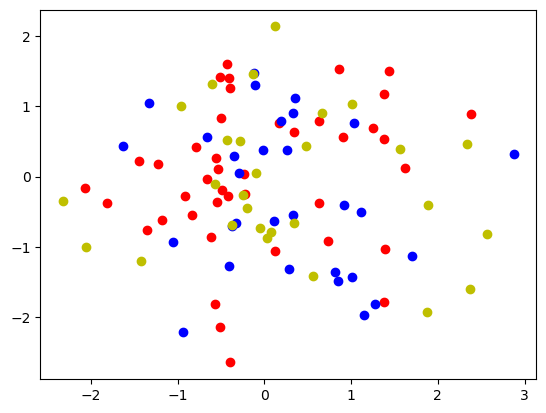

In [127]:
colors = ['r', 'b', 'y']
for c in range(k):
    plt.scatter(
        X_data[y_labels==c][:, 0],
        X_data[y_labels==c][:, 1],
        color=colors[c]
    )
plt.show()